<a href="https://colab.research.google.com/github/NasimulNabil/Final-Defense/blob/main/Final_ML(Prediction_of_Credit_Recovery_with_Feature_Importance_in_Machine_Learning2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Research/loan_data_feature.csv')
df.head()

,long_term,emi_loan,individual_loan,consumer_loan,agri_loan,interest_free,staff_loan,secured_unsecured,annual_income_lavel,loan_type,good_credit_life,customer_relation_day,contract_value,contract_mat_day_remain,customer_age_year,int_rate,current_os_amount,total_sanction_amt,total_disb_amt,total_recov_amt,total_int_amt,total_repayable_amt,emi_amount,num_of_installment,pay_month_01,pay_month_02,pay_month_03,pay_month_04,pay_month_05,pay_month_06,bill_amount_01,bill_amount_02,bill_amount_03,bill_amount_04,bill_amount_05,bill_amount_06,number_of_loan_ac,good_credit,total_bl_countMoreThanOne,total_bl_countOne,repayment_frequencyMonth,repayment_frequencyMoreThanMonth,total_bill_amount,mean_bill_amount,total_pay_amount,mean_pay_amount,ratio_of_total_payment,ratio_of_bill_payment,ratio_of_disb_amt_and_good_credit,number_of_installment_paid
0,1,0,1,0,0,0,1,1,1.0,2.0,732,1097.0,64800.0,394,22.0,9.0,37232.0,50000.0,50000.0,19350.0,6582.0,43200.0,1800.0,36,1.0,1.0,1.0,1,1,1,14850.0,14850.0,18450.0,20250.0,22050.0,23850.0,1,0,0,1,1,0,114300.0,19050.0000,6.0,1.000000,1.157407,19050.000000,68.306011,10.750000
1,1,1,1,0,0,0,1,0,1.0,3.0,606,1741.0,426000.0,487,33.0,13.0,278523.0,300000.0,300000.0,21500.0,300023.0,213000.0,14200.0,30,8000.0,1.0,1.0,1000,1000,1500,123500.0,137700.0,151900.0,165600.0,178800.0,191500.0,1,0,0,1,1,0,949000.0,158166.6667,11502.0,1917.000000,1.408451,82.507390,495.049505,1.514085
2,1,1,1,0,0,0,1,0,4.0,3.0,618,1026.0,511200.0,660,37.0,13.0,266854.0,300000.0,300000.0,33200.0,300054.0,213000.0,14200.0,36,1.0,1.0,1.0,5000,1,1,113300.0,127500.0,141700.0,151400.0,165600.0,179800.0,1,0,0,1,1,0,879300.0,146550.0000,5005.0,834.166667,1.408451,175.684316,485.436893,2.338028
3,1,1,1,0,0,0,1,0,4.0,3.0,564,878.0,511200.0,715,28.0,13.0,280000.0,300000.0,300000.0,20000.0,300000.0,184600.0,14200.0,36,1.0,1.0,1.0,1,1,1,93600.0,107800.0,122000.0,136200.0,150400.0,164600.0,1,0,0,1,1,0,774600.0,129100.0000,6.0,1.000000,1.625135,129100.000000,531.914894,1.408451
4,1,1,1,1,0,1,1,0,1.0,6.0,425,2020.0,540288.0,1065,45.0,13.0,436384.0,1175000.0,1175000.0,16000.0,52384.0,157584.0,11256.0,48,1.0,1.0,1.0,1,1,5000,90304.0,101560.0,112816.0,124072.0,135328.0,141584.0,5,1,0,1,1,0,705664.0,117610.6667,5005.0,834.166667,7.456341,140.991808,2764.705882,1.421464


In [ ]:
df.shape

(4600, 50)

In [ ]:
df.isnull().any()

long_term                            False
emi_loan                             False
individual_loan                      False
consumer_loan                        False
agri_loan                            False
interest_free                        False
staff_loan                           False
secured_unsecured                    False
annual_income_lavel                  False
loan_type                            False
good_credit_life                     False
customer_relation_day                False
contract_value                       False
contract_mat_day_remain              False
customer_age_year                    False
int_rate                             False
current_os_amount                    False
total_sanction_amt                   False
total_disb_amt                       False
total_recov_amt                      False
total_int_amt                        False
total_repayable_amt                  False
emi_amount                           False
num_of_inst

In [ ]:
df.describe()

,long_term,emi_loan,individual_loan,consumer_loan,agri_loan,interest_free,staff_loan,secured_unsecured,annual_income_lavel,loan_type,good_credit_life,customer_relation_day,contract_value,contract_mat_day_remain,customer_age_year,int_rate,current_os_amount,total_sanction_amt,total_disb_amt,total_recov_amt,total_int_amt,total_repayable_amt,emi_amount,num_of_installment,pay_month_01,pay_month_02,pay_month_03,pay_month_04,pay_month_05,pay_month_06,bill_amount_01,bill_amount_02,bill_amount_03,bill_amount_04,bill_amount_05,bill_amount_06,number_of_loan_ac,good_credit,total_bl_countMoreThanOne,total_bl_countOne,repayment_frequencyMonth,repayment_frequencyMoreThanMonth,total_bill_amount,mean_bill_amount,total_pay_amount,mean_pay_amount,ratio_of_total_payment,ratio_of_bill_payment,ratio_of_disb_amt_and_good_credit,number_of_installment_paid
count,4600.0,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4.600000e+03,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000
mean,1.0,0.713696,0.888696,0.119783,0.014783,0.120435,0.888696,0.780435,1.817607,2.028982,517.769348,1386.743149,1.777041e+06,1.308415e+03,42.201919,9.622935,78411.473448,1.264629e+05,1.185913e+05,16941.131185,9466.971070,2.433128e+05,17466.870096,56.819130,826.763252,1005.599228,1132.079954,783.709783,944.139130,1140.625870,1.456378e+05,1.635493e+05,1.708275e+05,1.845232e+05,1.992130e+05,2.119296e+05,1.431739,0.196087,0.070652,0.929348,0.973043,0.026957,1.075681e+06,1.792801e+05,5832.917217,972.152870,2.088943,4.194499e+04,272.730531,3.477550
std,0.0,0.452083,0.314543,0.324742,0.120695,0.325505,0.314543,0.413997,0.852243,1.825929,137.531517,1649.788843,4.414133e+07,2.885902e+04,11.742906,1.903935,76894.946036,1.793228e+05,1.673392e+05,29524.363935,16731.457321,7.318280e+05,53569.402777,948.088474,3078.644522,5601.062043,4760.222867,2633.568507,3667.455761,6315.678007,4.620690e+05,5.154544e+05,5.594252e+05,6.102264e+05,6.586448e+05,7.120261e+05,1.300021,0.397078,0.256271,0.256271,0.161974,0.161974,3.500029e+06,5.833382e+05,16012.690282,2668.781714,3.329046,1.778123e+05,716.843344,4.581254
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,100.000000,236.000000,1.200000e+04,0.000000e+00,1.000000,5.000000,10155.000000,1.200000e+04,1.079200e+04,0.000000,0.000000,6.000000e+03,450.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-5.940000e+04,-7.465000e+04,-1.000000e+05,-1.056000e+05,-1.028000e+05,-1.084000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.670000e+05,-7.783333e+04,5.000000,0.833333,0.004193,-2.235000e+03,18.891688,0.000000
25%,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,417.000000,668.750000,6.000000e+04,3.330000e+02,34.000000,9.000000,40266.750000,5.000000e+04,5.000000e+04,0.000000,2571.000000,2.700000e+04,2000.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.400000e+04,1.600000e+04,1.735000e+04,1.870000e+04,2.014000e+04,2.160000e+04,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.122750e+05,1.871250e+04,6.000000,1.000000,1.111111,6.964260e+01,87.299384,0.000000
50%,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,488.000000,828.000000,7.200000e+04,5.690000e+02,42.000000,9.000000,50250.000000,5.000000e+04,5.113600e+04,6000.000000,4563.500000,3.800000e+04,2500.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.815000e+04,2.015000e+04,2.215000e+04,2.400000e+04,2.600000e+04,2.783200e+04,1.

In [ ]:
df.columns

Index(['long_term', 'emi_loan', 'individual_loan', 'consumer_loan',
       'agri_loan', 'interest_free', 'staff_loan', 'secured_unsecured',
       'annual_income_lavel', 'loan_type', 'good_credit_life',
       'customer_relation_day', 'contract_value', 'contract_mat_day_remain',
       'customer_age_year', 'int_rate', 'current_os_amount',
       'total_sanction_amt', 'total_disb_amt', 'total_recov_amt',
       'total_int_amt', 'total_repayable_amt', 'emi_amount',
       'num_of_installment', 'pay_month_01', 'pay_month_02', 'pay_month_03',
       'pay_month_04', 'pay_month_05', 'pay_month_06', 'bill_amount_01',
       'bill_amount_02', 'bill_amount_03', 'bill_amount_04', 'bill_amount_05',
       'bill_amount_06', 'number_of_loan_ac', 'good_credit',
       'total_bl_countMoreThanOne', 'total_bl_countOne',
       'repayment_frequencyMonth', 'repayment_frequencyMoreThanMonth',
       'total_bill_amount', 'mean_bill_amount', 'total_pay_amount',
       'mean_pay_amount', 'ratio_of_total_paym

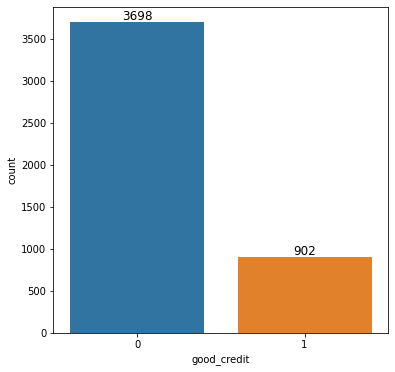

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax1,x='good_credit', data=df)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height + 30, 
        df['good_credit'].value_counts()[i],ha="center",fontsize = 12)
    i += 1

In [ ]:
x = df.drop(['good_credit'],axis=1)
x.head()

,long_term,emi_loan,individual_loan,consumer_loan,agri_loan,interest_free,staff_loan,secured_unsecured,annual_income_lavel,loan_type,good_credit_life,customer_relation_day,contract_value,contract_mat_day_remain,customer_age_year,int_rate,current_os_amount,total_sanction_amt,total_disb_amt,total_recov_amt,total_int_amt,total_repayable_amt,emi_amount,num_of_installment,pay_month_01,pay_month_02,pay_month_03,pay_month_04,pay_month_05,pay_month_06,bill_amount_01,bill_amount_02,bill_amount_03,bill_amount_04,bill_amount_05,bill_amount_06,number_of_loan_ac,total_bl_countMoreThanOne,total_bl_countOne,repayment_frequencyMonth,repayment_frequencyMoreThanMonth,total_bill_amount,mean_bill_amount,total_pay_amount,mean_pay_amount,ratio_of_total_payment,ratio_of_bill_payment,ratio_of_disb_amt_and_good_credit,number_of_installment_paid
0,1,0,1,0,0,0,1,1,1.0,2.0,732,1097.0,64800.0,394,22.0,9.0,37232.0,50000.0,50000.0,19350.0,6582.0,43200.0,1800.0,36,1.0,1.0,1.0,1,1,1,14850.0,14850.0,18450.0,20250.0,22050.0,23850.0,1,0,1,1,0,114300.0,19050.0000,6.0,1.000000,1.157407,19050.000000,68.306011,10.750000
1,1,1,1,0,0,0,1,0,1.0,3.0,606,1741.0,426000.0,487,33.0,13.0,278523.0,300000.0,300000.0,21500.0,300023.0,213000.0,14200.0,30,8000.0,1.0,1.0,1000,1000,1500,123500.0,137700.0,151900.0,165600.0,178800.0,191500.0,1,0,1,1,0,949000.0,158166.6667,11502.0,1917.000000,1.408451,82.507390,495.049505,1.514085
2,1,1,1,0,0,0,1,0,4.0,3.0,618,1026.0,511200.0,660,37.0,13.0,266854.0,300000.0,300000.0,33200.0,300054.0,213000.0,14200.0,36,1.0,1.0,1.0,5000,1,1,113300.0,127500.0,141700.0,151400.0,165600.0,179800.0,1,0,1,1,0,879300.0,146550.0000,5005.0,834.166667,1.408451,175.684316,485.436893,2.338028
3,1,1,1,0,0,0,1,0,4.0,3.0,564,878.0,511200.0,715,28.0,13.0,280000.0,300000.0,300000.0,20000.0,300000.0,184600.0,14200.0,36,1.0,1.0,1.0,1,1,1,93600.0,107800.0,122000.0,136200.0,150400.0,164600.0,1,0,1,1,0,774600.0,129100.0000,6.0,1.000000,1.625135,129100.000000,531.914894,1.408451
4,1,1,1,1,0,1,1,0,1.0,6.0,425,2020.0,540288.0,1065,45.0,13.0,436384.0,1175000.0,1175000.0,16000.0,52384.0,157584.0,11256.0,48,1.0,1.0,1.0,1,1,5000,90304.0,101560.0,112816.0,124072.0,135328.0,141584.0,5,0,1,1,0,705664.0,117610.6667,5005.0,834.166667,7.456341,140.991808,2764.705882,1.421464


In [ ]:
x.shape

(4600, 49)

In [ ]:
y = df['good_credit']
y

0       0
1       0
2       0
3       0
4       1
       ..
4595    0
4596    0
4597    0
4598    0
4599    0
Name: good_credit, Length: 4600, dtype: int64

In [ ]:
y.value_counts()

0    3698
1     902
Name: good_credit, dtype: int64

### **SMOTE Technique**

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)
unique, counts = np.unique(y_sm, return_counts=True)
dict(zip(unique, counts))

{0: 3698, 1: 3698}

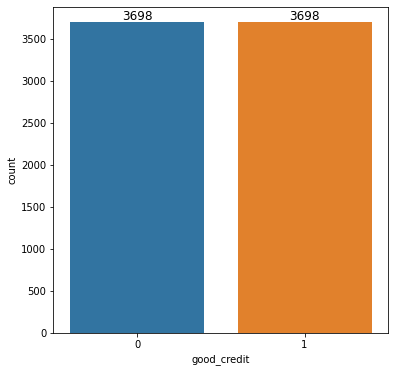

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,6))
graph = sns.countplot(x=y_sm)
i = 0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height + 30, 
        counts[i],ha="center",fontsize = 12)
    i += 1

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
scale_inputs = standardization.fit_transform(x_sm)

In [ ]:
x_sm = scale_inputs
x_sm

array([[ 0.        , -1.44102016,  0.37245415, ..., -0.10480828,
        -0.29644945,  1.35415299],
       [ 0.        ,  0.69395282,  0.37245415, ..., -0.2178762 ,
         0.11184549, -0.52391554],
       [ 0.        ,  0.69395282,  0.37245415, ..., -0.21732076,
         0.10264844, -0.35637149],
       ...,
       [ 0.        ,  0.69395282,  0.37245415, ..., -0.21540855,
         0.45198502, -0.74135051],
       [ 0.        ,  0.69395282,  0.37245415, ..., -0.21580251,
         0.02682285, -0.71857178],
       [ 0.        , -1.44102016,  0.37245415, ..., -0.13375686,
        -0.24679442, -0.78416739]])

### **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(5916, 49)
(1480, 49)


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 2958, 1: 2958}

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 740, 1: 740}

### **LightGBM Features Importance**

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
clf.score(x_test,y_test)

0.9155405405405406

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()
# clf.fit(x_train,y_train)
# clf.score(x_test,y_test)

In [ ]:
# from xgboost import XGBClassifier
# clf = XGBClassifier()
# clf.fit(x_train,y_train)
# clf.score(x_test,y_test)

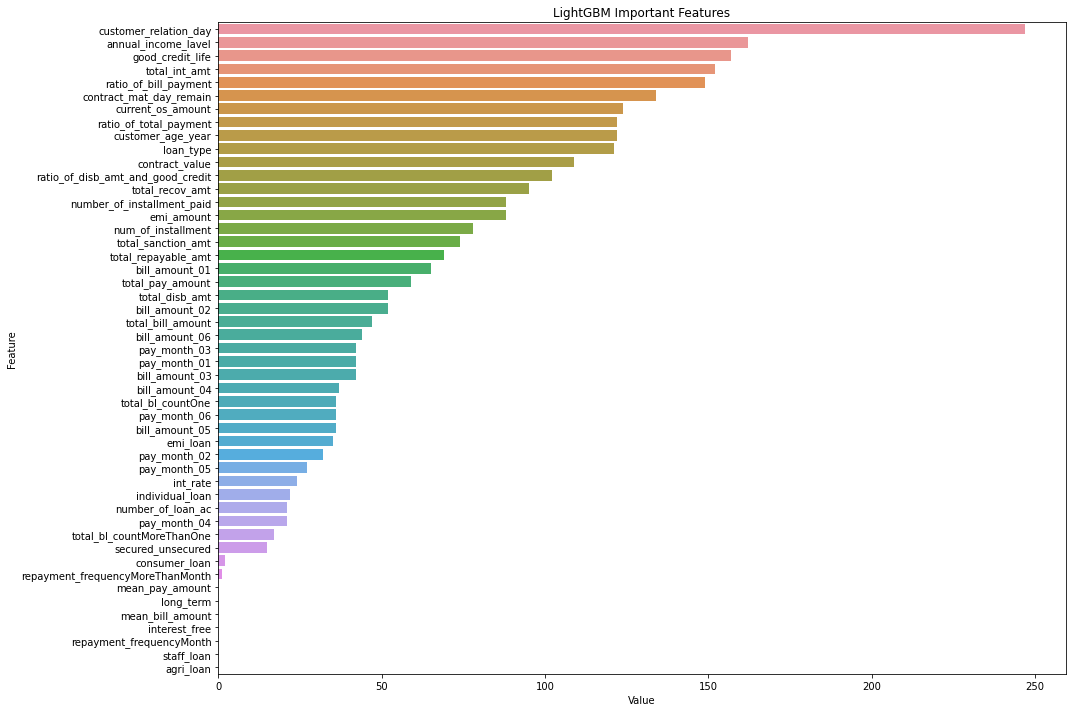

<Figure size 432x288 with 0 Axes>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Important Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [ ]:
x.drop(['mean_pay_amount','long_term','mean_bill_amount','interest_free','repayment_frequencyMonth','staff_loan','agri_loan'],axis=1,inplace=True)
x.shape

(4600, 42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)
unique, counts = np.unique(y_sm, return_counts=True)
dict(zip(unique, counts))

{0: 3698, 1: 3698}

In [ ]:
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
scale_inputs = standardization.fit_transform(x_sm)

In [ ]:
x_sm = scale_inputs
x_sm

array([[-1.43042948,  0.37127638, -0.40042337, ..., -0.11018163,
        -0.30710107,  1.33360403],
       [ 0.69909074,  0.37127638, -0.40042337, ..., -0.21217086,
         0.13703612, -0.53219278],
       [ 0.69909074,  0.37127638, -0.40042337, ..., -0.21166985,
         0.12703171, -0.3657435 ],
       ...,
       [-1.43042948,  0.37127638, -0.40042337, ..., -0.03515974,
        -0.28067215, -0.83806111],
       [ 0.69909074,  0.37127638,  2.49735672, ..., -0.21261649,
         2.50482222,  2.46449462],
       [-1.43042948,  0.37127638, -0.40042337, ..., -0.0573349 ,
        -0.28025736, -0.21300698]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(5916, 42)
(1480, 42)


### **Machine Learning Algorithms**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,auc,classification_report,mean_absolute_error,mean_squared_error,matthews_corrcoef
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC(probability=True)
gnb = GaussianNB()
bnb = BernoulliNB()
xgb = XGBClassifier()
ada = AdaBoostClassifier()
lda = LinearDiscriminantAnalysis()
models = {
     'Logistic Regression': lr,
     'Random Forest': rf,
     'KNN': knn,
     'Decision Tree': dt,
     'Support Vector Machine': svm,
     'Gaussian Naive Bayes': gnb,
     'Bernoulli Naive Bayes': bnb,
     'XGBoost': xgb,
     'AdaBoost': ada,
     'Linear Discriminant Analysis': lda,
}
results = []


for name,model in models.items():
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    predictions = model.predict(x_test)
    mae = mean_absolute_error(y_test,predictions)
    mse = mean_squared_error(y_test,predictions)
    rmse = math.sqrt(mse)
    mcc = matthews_corrcoef(y_test,predictions)
    results.append({
        'model': name,
        'Accuracy_Score':score,
        'Precision': precision_score(y_test,predictions),
        'Recall': recall_score(y_test,predictions),
        'F1-Score': f1_score(y_test,predictions),
        'AUC': roc_auc_score(y_test,model.predict_proba(x_test)[:, 1]),
        'MAE': mae,
        'RMSE': rmse,
        'MCC': mcc
    })
    msg = "%s : %f " % (name, score)
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression : 0.769595 
Random Forest : 0.926351 
KNN : 0.834459 
Decision Tree : 0.860135 
Support Vector Machine : 0.811486 
Gaussian Naive Bayes : 0.511486 
Bernoulli Naive Bayes : 0.643919 
XGBoost : 0.885135 
AdaBoost : 0.856081 
Linear Discriminant Analysis : 0.752027 


In [ ]:
print("Actual value : ")
print(y_test[:20])

for name,model in models.items():
  predictions = model.predict(x_test)
  print(name)
  print(predictions[:20])
  print()

Actual value : 
468     1
113     0
196     1
4520    0
1981    0
1924    0
1115    0
2497    0
6924    1
4805    1
2595    1
3631    0
3833    0
47      0
1464    0
6474    1
1815    0
2716    0
4510    0
1974    1
Name: good_credit, dtype: int64
Logistic Regression
[1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0]

Random Forest
[1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0]

KNN
[1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0]

Decision Tree
[0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0]

Support Vector Machine
[1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0]

Gaussian Naive Bayes
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Bernoulli Naive Bayes
[0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0]

XGBoost
[0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0]

AdaBoost
[0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0]

Linear Discriminant Analysis
[1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0]



In [ ]:
for name,model in models.items():
  predictions = model.predict(x_test)
  print(name)
  print(classification_report(y_test,predictions))
  print()

Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       740
           1       0.80      0.71      0.76       740

    accuracy                           0.77      1480
   macro avg       0.77      0.77      0.77      1480
weighted avg       0.77      0.77      0.77      1480


Random Forest
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       740
           1       0.94      0.91      0.92       740

    accuracy                           0.93      1480
   macro avg       0.93      0.93      0.93      1480
weighted avg       0.93      0.93      0.93      1480


KNN
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       740
           1       0.82      0.85      0.84       740

    accuracy                           0.83      1480
   macro avg       0.83      0.83      0.83      1480
weighted avg       0.83      0.83 

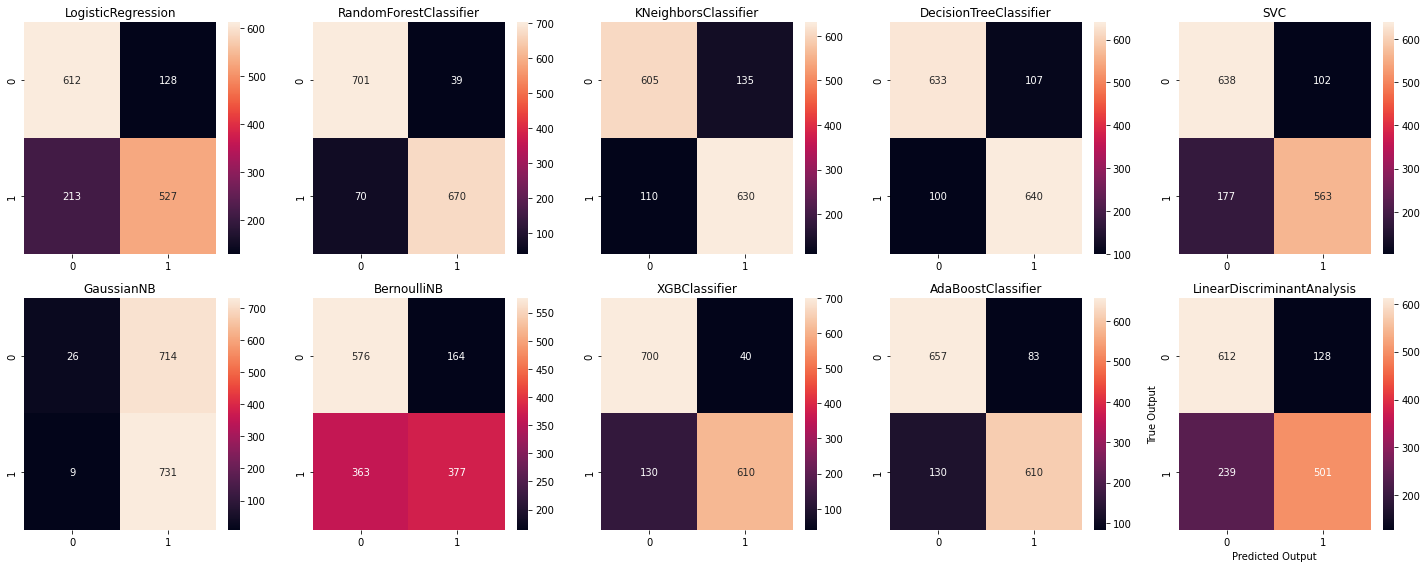

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,8))

for cls, ax in zip(models.values(), axes.flatten()):
    predictions = cls.predict(x_test)
    con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=predictions)
    sns.heatmap(con_matrix,annot=True,ax=ax,fmt='d')
    plt.xlabel('Predicted Output')
    plt.ylabel('True Output')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

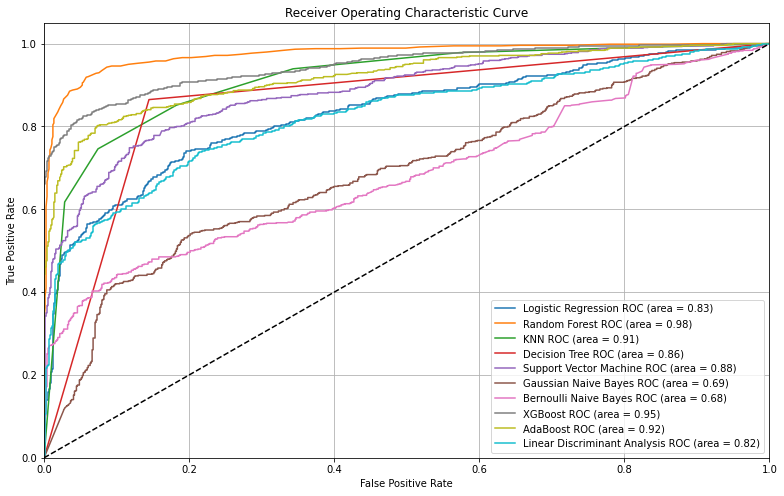

In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(13,8))
for name,model in models.items():

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = roc_auc_score(y_test,model.predict_proba(x_test)[:, 1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
    
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame(results,columns = ['model','Accuracy_Score','Precision','Recall','F1-Score','AUC','MAE','RMSE','MCC'])
df

,model,Accuracy_Score,Precision,Recall,F1-Score,AUC,MAE,RMSE,MCC
0,Logistic Regression,0.769595,0.804580,0.712162,0.755556,0.830940,0.230405,0.480006,0.542782
1,Random Forest,0.926351,0.944993,0.905405,0.924776,0.975757,0.073649,0.271383,0.853452
2,KNN,0.834459,0.823529,0.851351,0.837209,0.913068,0.165541,0.406867,0.669301
3,Decision Tree,0.860135,0.856760,0.864865,0.860794,0.860135,0.139865,0.373985,0.720302
4,Support Vector Machine,0.811486,0.846617,0.760811,0.801423,0.883965,0.188514,0.434181,0.626197
5,Gaussian Naive Bayes,0.511486,0.505882,0.987838,0.669108,0.687614,0.488514,0.698937,0.075593
6,Bernoulli Naive Bayes,0.643919,0.696858,0.509459,0.588603,0.680909,0.356081,0.596725,0.298847
7,XGBoost,0.885135,0.938462,0.824324,0.877698,0.945026,0.114865,0.338917,0.776031
8,AdaBoost,0.856081,0.880231,0.824324,0.851361,0.919554,0.143919,0.379366,0.713603
9,Linear Discriminant Analysis,0.752027,0.796502,0.677027,0.731921,0.823470,0.247973,0.497969,0.509822


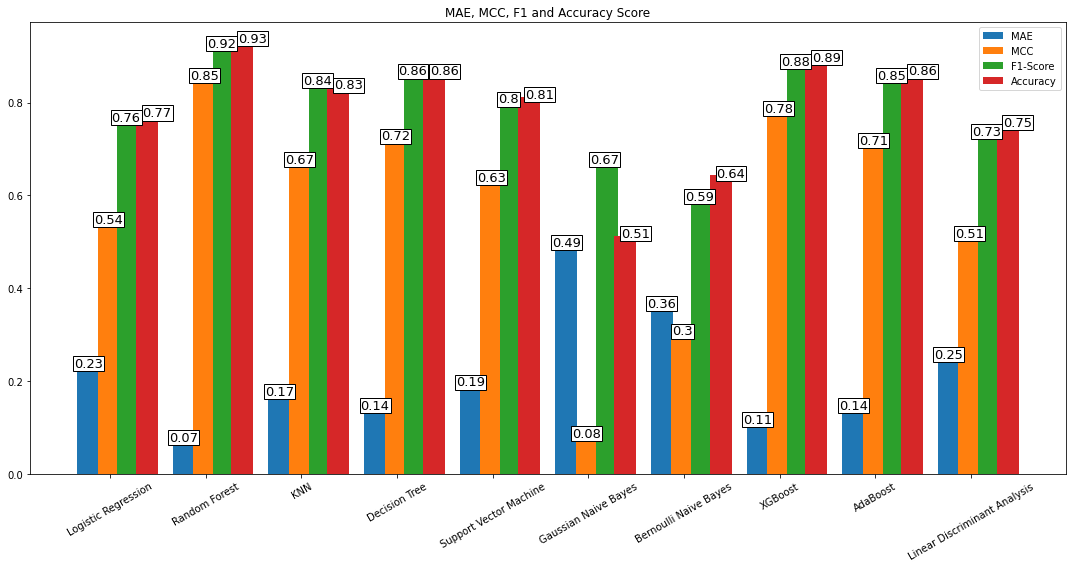

In [ ]:
x = np.arange(len(df['model']))  # the label locations
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
# rects1 = ax.bar(x + width/2, df['Precision'], width, label='F1-Score')
rects1 = ax.bar(x-width, df['MAE'], width, label='MAE')
rects2 = ax.bar(x - width/15, df['MCC'], width, label='MCC')
rects3 = ax.bar(x + width/1.2, df['F1-Score'], width, label='F1-Score')
rects4 = ax.bar(x + width/1.2 + width/1.2, df['Accuracy_Score'], width, label='Accuracy')

# ax.set_ylabel('MAE, MCC, F1 and Accuracy')
ax.set_title('MAE, MCC, F1 and Accuracy Score')
ax.set_xticks(x)
plt.xticks(rotation=30)
ax.set_xticklabels(df['model'])
for i in range(len(df['model'])):
  plt.text(i-width,round(df['MAE'][i],2), round(df['MAE'][i],2),ha="center",size=13,bbox = {
      'faceColor': 'white',  
      'alpha': 1,
      'pad': 1
   })
  plt.text(i - width/15,round(df['MCC'][i],2), round(df['MCC'][i],2),ha="center",size=13,bbox = {  
      'faceColor': 'white',  
      'alpha': 1,
      'pad': 1
   })
  plt.text(i + 0.2/1.2,round(df['F1-Score'][i],2), round(df['F1-Score'][i],2),ha="center",size=13,bbox = {  
      'faceColor': 'white',  
      'alpha': 1,
      'pad': 1
   })
  plt.text(i + width/1.2 + 0.30,round(df['Accuracy_Score'][i],2), round(df['Accuracy_Score'][i],2),ha="center",size=13,bbox = {
      'faceColor': 'white',  
      'alpha': 1,
      'pad': 1
   })
ax.legend()

fig.tight_layout()  

plt.show()